In [1]:
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import pickle
import pandas as pd
import random
import cv2

Using TensorFlow backend.


In [2]:
#this for getting the dataset from repo
!git clone https://njnitesh@bitbucket.org/jadslim/german-traffic-signs.git

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [3]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
np.random.seed(0)

In [0]:
with open('german-traffic-signs/train.p','rb') as f:
    train_data=pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
    val_data=pickle.load(f)
with open('german-traffic-signs/test.p','rb') as f:
    test_data=pickle.load(f)

In [6]:
train_data["features"].shape

(34799, 32, 32, 3)

In [0]:
x_train, y_train=train_data["features"],train_data["labels"]
x_val, y_val=val_data["features"],val_data["labels"]
x_test, y_test=test_data["features"],test_data["labels"]

In [8]:
data=pd.read_csv('german-traffic-signs/signnames.csv')
data.SignName[y_train[0]]

'End of no passing'

In [0]:
nrow=43
ncol=5
#x_sel=x_train[y_train==2]
#x_sel.shape

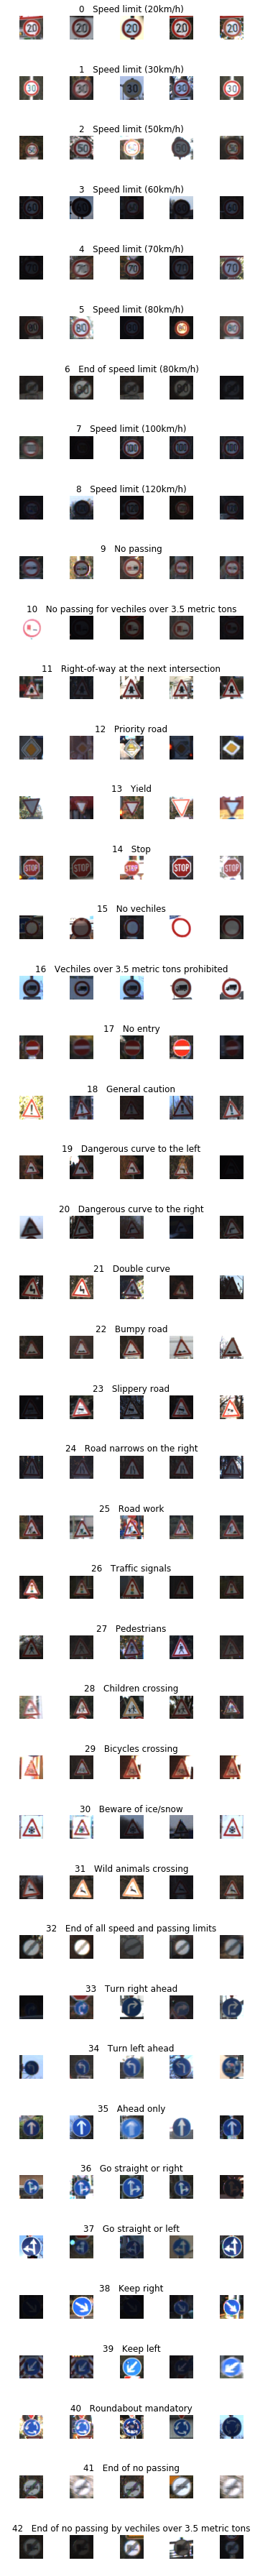

In [10]:
fig, axis=plt.subplots(nrows=43, ncols=ncol, figsize=(5,50))  
num_sample=[]
fig.tight_layout()
for i in range(ncol):
    for j, names in data.iterrows():
        x_sel=x_train[y_train==j]
        axis[j][i].imshow(x_sel[random.randint(0,len(x_sel)-1),:,:], cmap=plt.get_cmap("gray"))
        axis[j][i].axis('off')
        if i==2:
            axis[j][i].set_title(str(j)+"   "+names["SignName"])
            num_sample.append(len(x_sel))

In [11]:
print(num_sample)

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0.5, 0, 'classes')

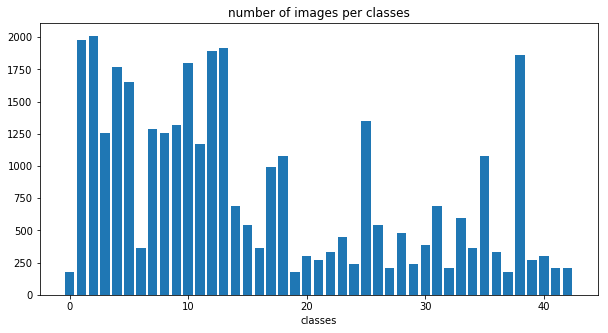

In [12]:
plt.figure(figsize=(10,5))
plt.bar(range(nrow),num_sample)
plt.title("number of images per classes")
plt.xlabel("classes")

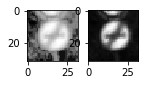

In [13]:
gray=cv2.cvtColor(x_train[1], cv2.COLOR_RGB2GRAY)
equalized=cv2.equalizeHist(gray)
fig,axis=plt.subplots(ncols=2, nrows=1, figsize=(2,1))
axis[0].imshow(equalized, cmap=plt.get_cmap("gray"))
axis[1].imshow(gray, cmap=plt.get_cmap("gray"))

In [0]:
def pre_pro(image):
    gray= cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    equl=cv2.equalizeHist(gray)
    return equl/255

In [0]:
g=list(map(pre_pro,x_train))
e=list(map(pre_pro,x_test))
d=list(map(pre_pro, x_val))

In [0]:
nx_train=np.array(g)
nx_train=nx_train.reshape(x_train.shape[0],32,32,1)
nx_test=np.array(e)
nx_test=nx_test.reshape(x_test.shape[0],32,32,1)
nx_val=np.array(d)
nx_val=nx_val.reshape(x_val.shape[0],32,32,1)

In [0]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
y_val=to_categorical(y_val)

In [0]:
def lenet_model():
    model=Sequential()
    model.add(Conv2D(30, (5,5), input_shape=(32,32,1), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3,3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(500, activation="relu"))
    model.add(Dropout(0.9))
    model.add(Dense(nrow, activation="softmax"))
    model.compile(Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"] )
    return model

In [19]:
m=lenet_model()
print(m.summary())
history = m.fit(nx_train, y_train, epochs=20, validation_data=(nx_val, y_val), shuffle=1, verbose=1, batch_size=400)

W0618 08:16:35.858438 140119401711488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 08:16:35.906366 140119401711488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 08:16:35.914801 140119401711488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0618 08:16:35.944291 140119401711488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0618 08:16:35.993419 140119401711488 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               270500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
__________

Text(0.5, 0, 'epoch')

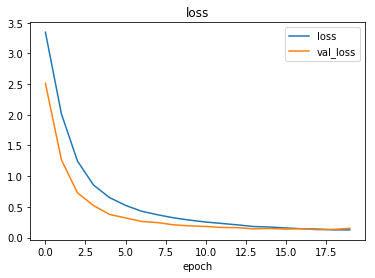

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('loss')
plt.xlabel('epoch')


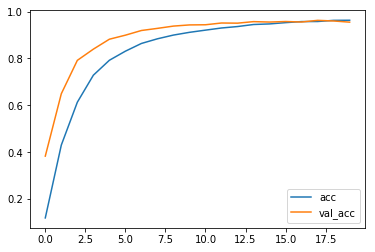

In [29]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])


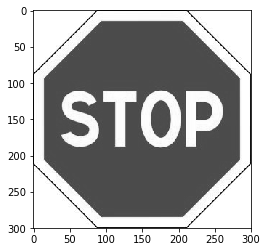

In [30]:
import cv2 as cv
from PIL import Image
import requests
url = 'https://www.drive-france.com/files/7914/2784/7530/French_Road_Sign_Stop.jpg'
response = requests.get(url,stream=True)
img = Image.open(response.raw).convert('L')
plt.imshow(img,cmap='gray')

In [0]:
img = np.array(img)

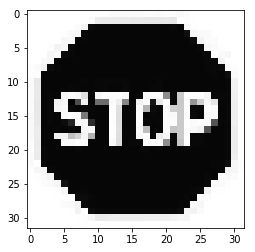

In [32]:
img_array = np.asarray(img)
res = cv.resize(img_array,(32,32))
# image = 255-res
plt.imshow(res,cmap='gray')

In [33]:
# img = res-255   #Normailization
res.shape

(32, 32)

In [0]:
var1 = res.reshape(1,32,32,1)

In [35]:
m.predict_classes(var1)

array([14])